In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Load the student_mat.csv file into a Pandas DataFrame
df = pd.read_csv("student_mat.csv")

In [9]:
# Display the first five rows
df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
# Check the shape of the dataset (number of rows and columns)
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

Dataset contains 395 rows and 33 columns.



In [34]:
# Display basic information about the dataset (column names, non-null values, data types)
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   pstatus     395 non-null    category
 6   medu        395 non-null    int64   
 7   fedu        395 non-null    int64   
 8   mjob        395 non-null    category
 9   fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    

In [11]:
# Display column names
print("Column Names:")
print(df.columns.tolist())

Column Names:
['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2', 'g3']


In [12]:
# Get summary statistics of numeric columns
df.describe()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [13]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values[missing_values > 0])

Missing Values per Column:
 Series([], dtype: int64)


In [14]:
# Check data types of all columns
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
pstatus       object
medu           int64
fedu           int64
mjob          object
fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup       bool
famsup          bool
paid            bool
activities      bool
nursery         bool
higher          bool
internet        bool
romantic        bool
famrel         int64
freetime       int64
goout          int64
dalc           int64
walc           int64
health         int64
absences       int64
g1             int64
g2             int64
g3             int64
dtype: object

In [15]:
# List of categorical columns that contain non-numeric values
categorical_cols = [
    "school", "sex", "address", "famsize", "pstatus", "mjob", "fjob", "reason",
    "guardian", "schoolsup", "famsup", "paid", "activities", "nursery",
    "higher", "internet", "romantic"
]
# Convert these columns to the "category" data type to optimize memory usage 
# and improve performance for operations like grouping, filtering, and encoding.
df[categorical_cols] = df[categorical_cols].astype("category")

In [16]:
# Convert categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display first 5 rows after encoding
df_encoded.head()


,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,...,guardian_mother,guardian_other,schoolsup_True,famsup_True,paid_True,activities_True,nursery_True,higher_True,internet_True,romantic_True
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


In [24]:
# Select numeric columns for scaling
num_cols = ['age', 'absences', 'g1', 'g2', 'g3']
scaler = MinMaxScaler()

# Apply scaling
df_scaled = df_encoded.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

In [25]:
# Display first 5 rows after normalization
df_scaled.head()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,...,guardian_mother,guardian_other,schoolsup_True,famsup_True,paid_True,activities_True,nursery_True,higher_True,internet_True,romantic_True
0,0.428571,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,0.285714,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,0.000000,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,0.000000,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,0.142857,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


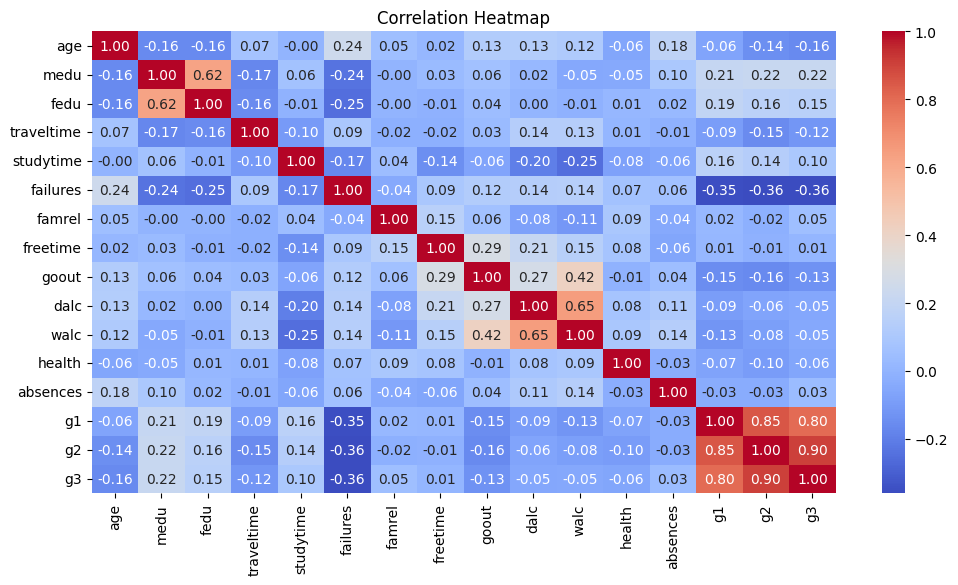

In [27]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])  

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

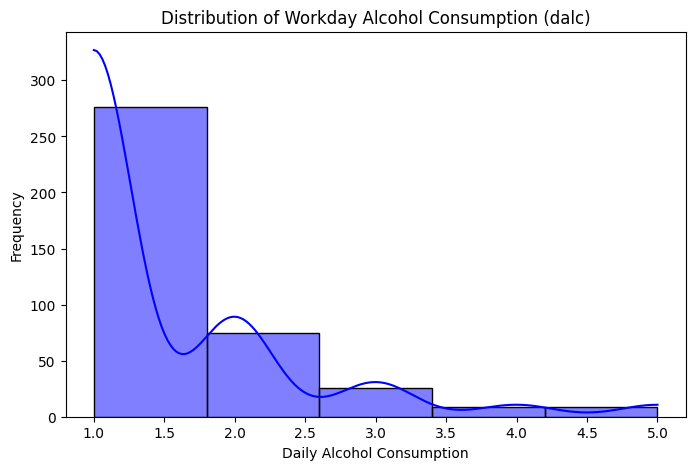

In [33]:
# Plot histogram of daily alcohol consumption
plt.figure(figsize=(8, 5))  # Set figure size
sns.histplot(df['dalc'], bins=5, kde=True, color='blue')  # Plot histogram with KDE
plt.title("Distribution of Workday Alcohol Consumption (dalc)")  # Add title
plt.xlabel("Daily Alcohol Consumption")  # Label x-axis
plt.ylabel("Frequency")  # Label y-axis
plt.show()  # Display plot